In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('1.csv')

In [3]:
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8


In [4]:
df.shape

(7, 4)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

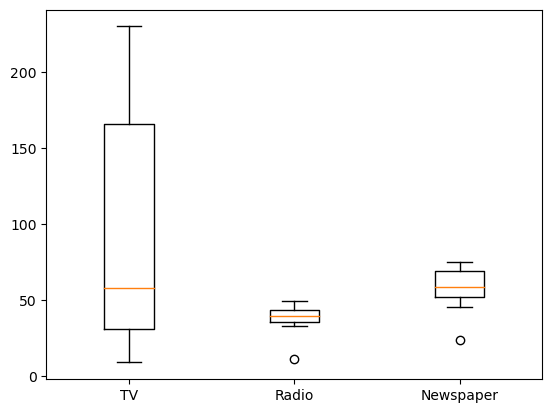

In [7]:
labels = ['TV','Radio','Newspaper']
w = plt.boxplot([df['TV'],df['Radio'],df['Newspaper']],labels = labels)
plt.show()

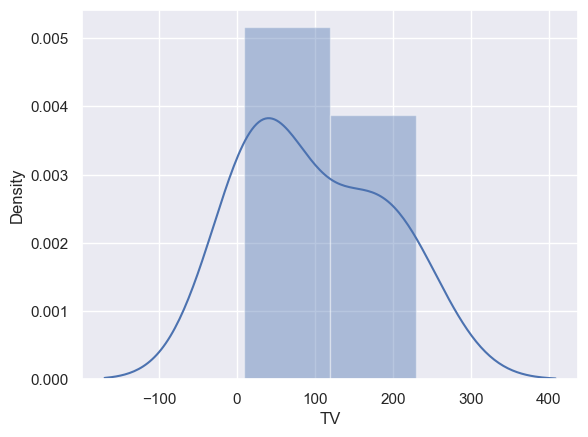

In [8]:
sns.set()
sns.distplot(df['TV'])
plt.show()

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,-0.538977,0.128379,0.963068
Radio,-0.538977,1.000000,0.310896,-0.476399
Newspaper,0.128379,0.310896,1.000000,0.143183
Sales,0.963068,-0.476399,0.143183,1.000000


<Axes: >

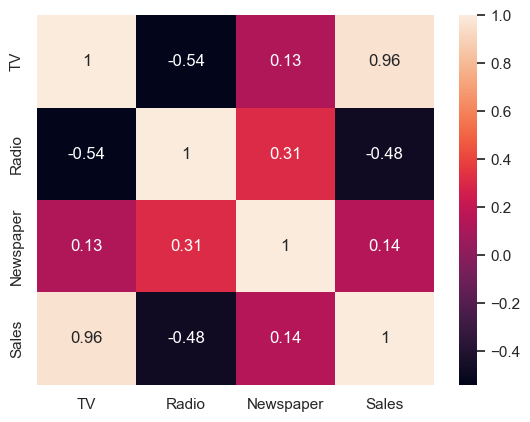

In [27]:
sns.heatmap(df.corr(),annot = True)

In [ ]:
#from this we can see that only tv affects the model and others dont, hence we can drop other values

In [44]:
X=df.drop(columns=['Sales','Radio','Newspaper'],axis=1)
Y=df['Sales']

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.167, random_state=2)

In [46]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
training_data_prediction=regressor.predict(X_train)


In [47]:
testing_data_prediction=regressor.predict(X_test)

In [48]:
r2_test=metrics.r2_score(Y_test,testing_data_prediction)
print("R-squared value",r2_test)


R-squared value 0.943511002595478


In [ ]:
r2_test=metrics.r2_score(Y_test,testing_data_prediction)
print("R-squared value",r2_test)


In [ ]:
#when we considered all the columns we got an r2 test score of -10 which means that even a horizontal line performs better than
# a linear regression line

In [ ]:
#when we drop tv and sales we get an r2 score of -58 which basically proves the point that tv is the only useful feature